[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ENu0dz0Qc210_ZwQhRAafu7b1qNIzAXT?usp=sharing&authuser=1#scrollTo=LsCPkxmpHlKM)

In [ ]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=d74318ee1db7c4162e5a7ec32baa943261880b5fa97f1e87bbfd1f9547299f41
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=7fdf9559584c833d638787451b8916776d0dad38e0c974a8970c45a663f80e6d
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import openml


## Importación del dataset

In [ ]:
dataset = openml.datasets.get_dataset(560)

<ipython-input-3-343d085db803>:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(560)


In [ ]:
# Obtener los datos como un DataFrame de Pandas
df_body, df_target, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)

In [ ]:
df_body.head(10)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [ ]:
x = df_body.values
y = df_target.values
X = x

In [ ]:
y = y.reshape(-1, 1)

In [ ]:
x.shape, y.shape

((252, 14), (252, 1))

## (División de los datos en entrenamiento y prueba)


In [ ]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Paso 1: Implementamos el modelo sin validación cruzada

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Ajustamos el modelo de regresión polinomial
# Definimos el grado del polinomio
# Transformamos las características existentes en características de mayor grado.

grado = 2

polynomial_features = PolynomialFeatures(degree=grado, include_bias=False)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Entrenamos el modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Hacemos predicciones usando el modelo ajustado
y_pred = model.predict(X_test_poly)

# Mostramos el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE) sin KFold: {mse:.2f}')
print(f'R²: {r2:.3f}')

Error cuadrático medio (MSE) sin KFold: 2.02
R²: 0.956


## Graficamos los resultados


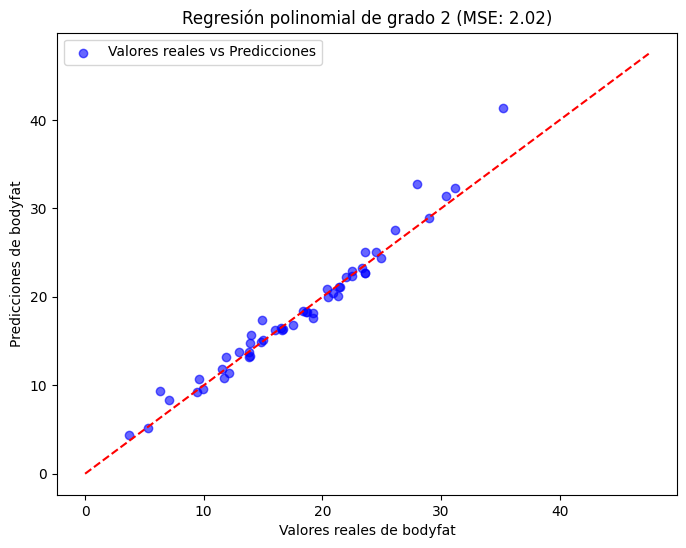

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Valores reales vs Predicciones')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Valores reales de bodyfat')
plt.ylabel('Predicciones de bodyfat')
plt.title(f'Regresión polinomial de grado {grado} (MSE: {mse:.2f})')
plt.legend()
plt.show()

## Paso 2: Implementamos la validación cruzada con KFold



In [ ]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(x, y, test_size=0.2, random_state=42)

# Realiza la validación cruzada
num_folds = 5

kf = KFold(n_splits=num_folds)

fold_errors = []

# Calcula el error de cada fold
for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X[train_index], X[test_index]
    y_train_k, y_test_k = y[train_index], y[test_index]

    grado = 2

    polynomial_features = PolynomialFeatures(degree=grado, include_bias=False)
    X_train_poly = polynomial_features.fit_transform(X_train_k)
    X_test_poly = polynomial_features.transform(X_test_k)


    model.fit(X_train_poly, y_train_k)

    y_pred_k = model.predict(X_test_poly)

    fold_error = mean_squared_error(y_test_k, y_pred_k)
    fold_errors.append(fold_error)

# Calcula el error medio de la validación cruzada
mean_cv_error = np.mean(fold_errors)

print("Errores de los Folds:", fold_errors)
print("Error medio de la validación cruzada:", mean_cv_error)


# Calcula el R^2 promedio de todos los pliegues de la validación cruzada
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)
print("R2 de los Folds: ", r2_scores)

# Calcula el R^2 promedio
mean_r2_score = np.mean(r2_scores)

print("R^2 promedio:", mean_r2_score)


Errores de los Folds: [9.359951026980417, 5.526177737750123, 2.4561244353972724, 2.1370703995959377, 2.4887131950305967]
Error medio de la validación cruzada: 4.393607358950869
R2 de los Folds:  [0.98040759 0.89907233 0.99296567 0.99043522 0.99205234]
R^2 promedio: 0.9709866303468624


## Graficamos los resultados


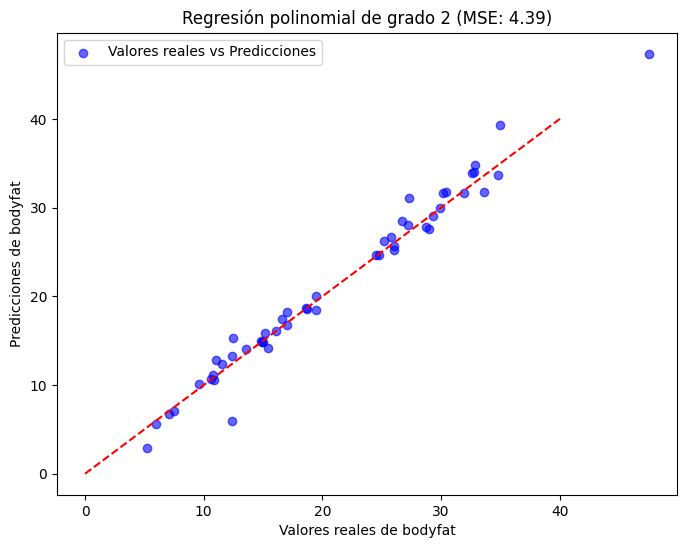

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_k, y_pred_k, color='blue', alpha=0.6, label='Valores reales vs Predicciones')
plt.plot([min(y_train_k), max(y_train_k)], [min(y_train_k), max(y_train_k)], color='red', linestyle='--')
plt.xlabel('Valores reales de bodyfat')
plt.ylabel('Predicciones de bodyfat')
plt.title(f'Regresión polinomial de grado {grado} (MSE: {mean_cv_error:.2f})')
plt.legend()
plt.show()